In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Lecture 5: Summary Statistics

Last update: Jan 21, 2019

This week we will review of some statistics and probability theory needed for doing data analysis.

We begin with summary statistics. In short, summary statistics summarize and provide information about your *sample* data. They describe the overall charactertics of your dataset such as where the average lies and whether your data is skewed, etc. We usually describe the dataset in the following dimensions:

- a measure of location, or *central tendency*
- a measure of sprea, or *dispersion*
- a measure of the shape of the distribution like *skewness*

In a way, how summary statistics characterize a dataset is similar to how Taylor's approximation characterizes a function. Breifly, central tendency is considered to be the first moment of data, dispersion is the second moment, skewness is the third moment, kurtosis is the fourth moment, etc.

First, let's do a quick survey on date-of-birth and month-of-birth of people in this class.

In [2]:
data = [
        (10, 1),
        (25, 3),
        (23, 2),
        (15, 7),
        (22, 9),
        (17, 9),
        (5, 10),
        (8, 11),
        (30, 12)
]

dob, mob = zip(*data)

## Central tendency

A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within that set of data. As such, measures of central tendency are sometimes called measures of central location. The mean (often called the average) is most likely the measure of central tendency that you are most familiar with, but there are others, such as the median and the mode.

### Sample mean or average

Sample mean, or average of a dataset usually denoted by $\bar{x}$ and is given by:

$$\bar{x} = \frac{\sum_{i}^N x_i }{N}$$

It can be used with both discrete and continuous data, although its use is most often with continuous data.
Keep in mind that the sample is sensitive to **outliers**


In [3]:
# mean
dob_avg = sum(dob)/len(dob)
mob_avg = sum(mob)/len(mob)
print('dob_avg =', dob_avg)
print('mob_avg =', mob_avg)


# using numpy
print('dob_avg =', np.mean(dob))
print('mob_avg =', np.mean(mob))

dob_avg = 17.22222222222222
mob_avg = 7.111111111111111
dob_avg = 17.22222222222222
mob_avg = 7.111111111111111


### Median 

Median is the middle value of a dataset when it is sorted. If there are odd numbers of items, take the average of the two middle ones. Unlike the sample mean, the median is less affected by outliers and skewed data.

In [7]:
# median
dob_med = np.median(dob)
mob_med = np.median(mob)
print('dob_med =', dob_med)
print('mob_med =', mob_med)

dob_med = 17.0
mob_med = 9.0


### Mode

The mode is the most frequent vaue in our dataset. On a histogram it represents the highest bar in a bar chart or histogram. You can, therefore, sometimes consider the mode as being the most popular option. It's common that we have multiple modes in a dataset.

In [8]:
?stats.mode

In [9]:
# mode
dob_mode = stats.mode(dob).mode
mob_mode = stats.mode(mob).mode
print('dob_mode=',dob_mode[0])
print('mob_mode=',mob_mode[0])

dob_mode= 5
mob_mode= 9


### Summary of when to use the mean, median and mode


| Type of Variable | Best measure of central tendency |
|------------------|----------------------------------|
|Categorical	|Mode |
|Ordinal	|Median |
|Interval/Ratio (not skewed)	|Mean |
|Interval/Ratio (skewed)	|Median |


## Dispersion

The term *Dispersion* refers to measures of how spread out our data is. A very simple statistics is `range` which is simply the difference between the minimum and the maximum values. Consider the following.

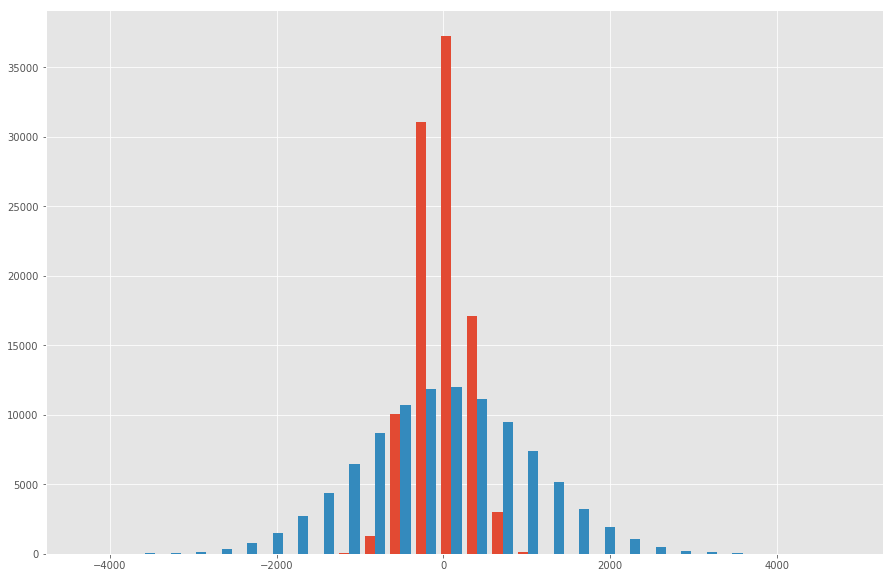

In [10]:
data1 = np.random.randn(100000,1)*300
data2 = np.random.randn(100000,1)*1000

plt.figure(figsize=(15,10))
_ = plt.hist(np.hstack([data1,data2]),bins=30)

### Range

The range is the difference between the highest and lowest values in a dataset and is the simplest measure of spread. So we calculate range as:

> Range = maximum value - minimum value


In [11]:
range_data1 = np.max(data1) - np.min(data1)
print("range of data1 = ", range_data1)

range_data2 = np.max(data2) - np.min(data2)
print("range of data2 = ", range_data2)

range of data1 =  2622.7930906166475
range of data2 =  9192.531020499719


### Quartiles and interqurtile range

Quartiles tell us about the spread of a data set by breaking the data set into quarters, just like the median breaks it in half. 

> Interquartile range (IQR) = Q3 - Q1


In [12]:
iqr_data1 = np.percentile(data1,75) -  np.percentile(data1,25) 
print('IQR of data1=', iqr_data1)
iqr_data2 = np.percentile(data2,75) -  np.percentile(data2,25) 
print('IQR of data2=', iqr_data2)

IQR of data1= 405.8561174231357
IQR of data2= 1360.0164502055386


### Variance and standard deviation

Another way to quantify spread is to measure the total amount of deviation from the mean:

$$\text{variance} = \frac{\sum_{i=1}^{N} ({x_i} - \bar{x})^2}{N} $$

$$\text{standard deviation} = \sqrt{\frac{\sum_{i=1}^{N} ({x_i} - \bar{x})^2}{N}} $$


In [13]:
var_data1 = np.var(data1)
var_data2 = np.var(data2)
print("variance of data1 = ", var_data1)
print("variance of data2 = ", var_data2)

std_data1 = np.std(data1)
std_data2 = np.std(data2)
print("sd of data1 = ", std_data1)
print("sd of data2 = ", std_data2)

variance of data1 =  90368.25641196013
variance of data2 =  1011044.7289886194
sd of data1 =  300.61313413082956
sd of data2 =  1005.5071998691105


## Histogram and other useful plots

Many times, it is not enough to look at just centers and spreads. We want to also look how the data is distributed. The histogram plot is very useful for describing a single dimension of the data.

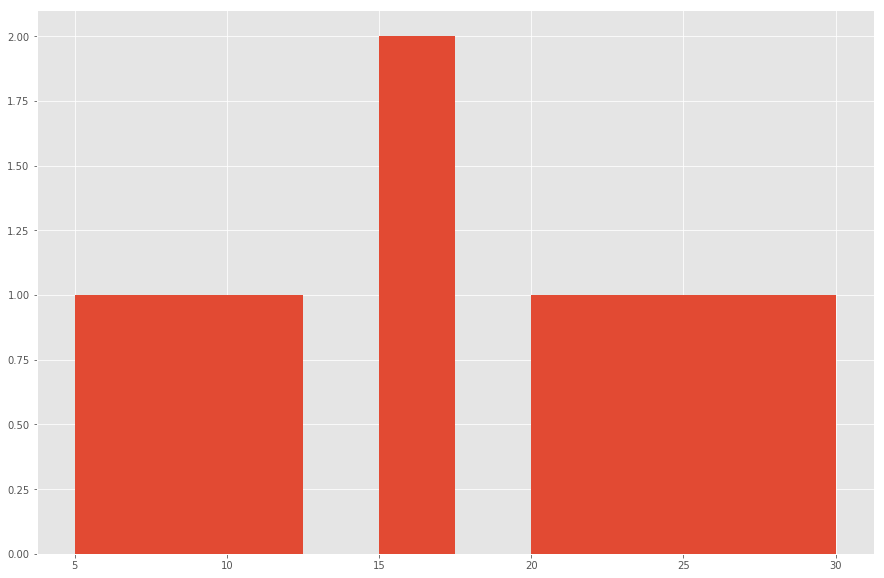

In [14]:
plt.figure(figsize=(15,10))
(n, bins, patches) = plt.hist(dob, bins=10)

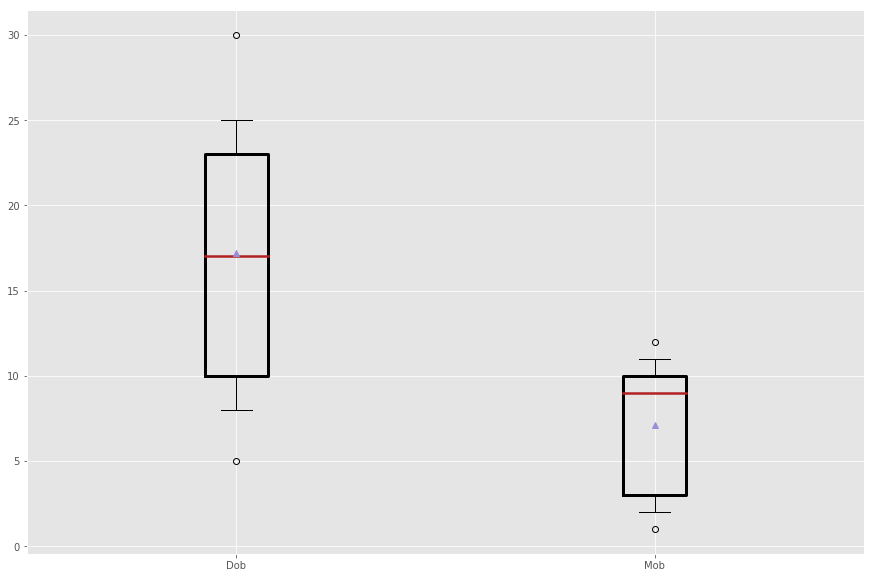

In [15]:
plt.figure(figsize=(15,10))
boxprops = dict(linestyle='-', linewidth=3)
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')
bp =plt.boxplot([dob,mob],labels=['Dob','Mob'],showmeans=True, whis=[5,95], boxprops=boxprops,medianprops=medianprops)

## Covariance and correlation

Suppose you want to investigate relationship between two variables. Lets verify if dob and mob are somehow related. We will first check out the covariance between these two variables.

$$cov(X,Y) = \frac{\sum_{i=1}^N (x_i - \bar{x})(y_i - \bar{y})}{N}$$

Covariance indicates how two variables related. A positive covariance means the variables are positively related, while a negative covariance means the variables are negatively or inversely related.

In [16]:
np.cov(dob, mob)

array([[71.44444444, -2.15277778],
       [-2.15277778, 16.86111111]])

Covariance is difficult to interpret because of they are scale-dependent. It's more common to look at the Pearson correleation coefficient.

>The Pearson correlation coefficient measures the linear relationship between two datasets. Strictly speaking, Pearson’s correlation requires that each dataset be normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

$$r(X,Y) = \frac{Cov(X,Y)}{S_X S_Y}$$

where $S_X$ and $S_Y$ are sample standard deviation of $X$ and $Y$ respectively.

In [17]:
(r,_) = stats.pearsonr(dob, mob)
r

-0.06202572864638308

Text(0,0.5,'Month')

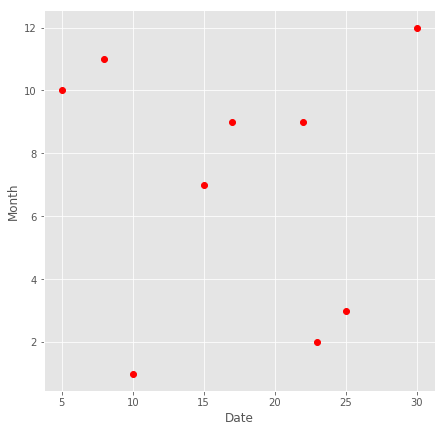

In [18]:
plt.figure(figsize=(7,7))
plt.plot(dob, mob, 'or')
plt.xlabel('Date')
plt.ylabel('Month')

#### Correlation and Causation

You have probably heard at some point that “correlation is not causation,” most likely by someone looking at data that posed a challenge to parts of his worldview that he was reluctant to question. Nonetheless, this is an important point—if x and y are strongly correlated, that might mean that x causes y, that y causes x, that each causes the other, that some third factor causes both, or it might mean nothing.

## Simpson's Paradox

One not uncommon surprise when analyzing data is Simpson’s Paradox, in which correlations can be misleading when **confounding** variables are ignored.

In [19]:
west_phd = np.random.randn(35,1)+3.1
east_phd = np.random.randn(70,1)+3.3
west_nonphd = np.random.randn(66,1)+10.9
east_nonphd = np.random.randn(33,1)+13.4

In [20]:
west = np.concatenate([west_phd, west_nonphd],axis=0)
east = np.concatenate([east_phd, east_nonphd],axis=0)

In [21]:
print("west",west.mean())
print("east",east.mean())

west 8.188248779333644
east 6.536259034815626


In [22]:
print("west phd",west_phd.mean())
print("east phd",east_phd.mean())
print("west nonphd",west_nonphd.mean())
print("east nonphd",east_nonphd.mean())

west phd 3.013134628294125
east phd 3.304045666763143
west nonphd 10.932627495793994
east nonphd 13.392469209472415


## Excercise:  Tripadvisor Reviews

Let's explore the following dataset:
https://archive.ics.uci.edu/ml/datasets/Travel+Reviews

Your tasks:
1. Download the dataset
1. Load it up as a dataframe with correct column names
1. Explore df.describe(), df.cov(), df.corr()
1. Create histograms of 'Average user feedback on restaurants' and 'Average user feedback on museums' (separately)
1. Create boxplots of ALL columns
1. Look for pairs of columns with **high** correlation (both positively and negatively)
1. Create 2D scatter plots of such pair

In [23]:
# Fill code here
! mkdir -p data && curl https://archive.ics.uci.edu/ml/machine-learning-databases/00484/tripadvisor_review.csv > ./data/tripadvisor_review.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 57307  100 57307    0     0  27528      0  0:00:02  0:00:02 --:--:-- 27524


In [24]:
! head -n 5 data/tripadvisor_review.csv

In [25]:
names=('user_id', 'avg_art_galleries', 'avg_dance_clubs', 'avg_juice_bars', 'avg_restaurants', 'avg_museums', 'avg_resorts', 'avg_parks/picnic_spots', 'avg_beaches', 'avg_theaters', 'avg_religious_institutions')
ignore_cols = ['user_id']
df = pd.read_csv('data/tripadvisor_review.csv', usecols=lambda x: x not in ignore_cols, names=names, header=None,  skiprows=1)
df[:10]

avg_art_galleries  avg_dance_clubs  avg_juice_bars  avg_restaurants  \
0               0.93             1.80            2.29             0.62   
1               1.02             2.20            2.66             0.64   
2               1.22             0.80            0.54             0.53   
3               0.45             1.80            0.29             0.57   
4               0.51             1.20            1.18             0.57   
5               0.99             1.28            0.72             0.27   
6               0.90             1.36            0.26             0.32   
7               0.74             1.40            0.22             0.41   
8               1.12             1.76            1.04             0.64   
9               0.70             1.36            0.22             0.26   

   avg_museums  avg_resorts  avg_parks/picnic_spots  avg_beaches  \
0         0.80         2.42                    3.19         2.79   
1         1.42         3.18                    3.21         2.63   
2         0.24         1.54                    3.18         2.80   
3         0.46         1.52                    3.18         2.96   
4         1.54         2.02                    3.18         2.78   
5         0.74         1.26                    3.17         2.89   
6         0.86         1.58                    3.17         2.66   
7         0.82         1.50                    3.17         2.81   
8         0.82         2.14                    3.18         2.79   
9         1.50         1.54                    3.17         2.82   

   avg_theaters  avg_religious_institutions  
0          1.82                        2.42  
1          1.86                        2.32  
2          1.31                        2.50  
3          1.57                        2.86  
4          1.18                        2.54  
5          1.66                        3.66  
6          1.22                        3.22  
7          1.54                        2.88  
8          1.41                        2.54  
9          2.24                        3.12

In [26]:
df.describe()

avg_art_galleries  avg_dance_clubs  avg_juice_bars  avg_restaurants  \
count         980.000000       980.000000      980.000000       980.000000   
mean            0.893194         1.352612        1.013306         0.532500   
std             0.326912         0.478280        0.788607         0.279731   
min             0.340000         0.000000        0.130000         0.150000   
25%             0.670000         1.080000        0.270000         0.410000   
50%             0.830000         1.280000        0.820000         0.500000   
75%             1.020000         1.560000        1.572500         0.580000   
max             3.220000         3.640000        3.620000         3.440000   

       avg_museums  avg_resorts  avg_parks/picnic_spots  avg_beaches  \
count   980.000000   980.000000              980.000000   980.000000   
mean      0.939735     1.842898                3.180939     2.835061   
std       0.437430     0.539538                0.007824     0.137505   
min       0.060000     0.140000                3.160000     2.420000   
25%       0.640000     1.460000                3.180000     2.740000   
50%       0.900000     1.800000                3.180000     2.820000   
75%       1.200000     2.200000                3.180000     2.910000   
max       3.300000     3.760000                3.210000     3.390000   

       avg_theaters  avg_religious_institutions  
count    980.000000                  980.000000  
mean       1.569439                    2.799224  
std        0.364629                    0.321380  
min        0.740000                    2.140000  
25%        1.310000                    2.540000  
50%        1.540000                    2.780000  
75%        1.760000                    3.040000  
max        3.170000                    3.660000

In [27]:
df.cov()

avg_art_galleries  avg_dance_clubs  \
avg_art_galleries                    0.106872        -0.029347   
avg_dance_clubs                     -0.029347         0.228752   
avg_juice_bars                       0.002220         0.016440   
avg_restaurants                      0.006717         0.017610   
avg_museums                         -0.014369         0.025028   
avg_resorts                          0.016605         0.038296   
avg_parks/picnic_spots              -0.000032         0.000412   
avg_beaches                          0.000900        -0.010433   
avg_theaters                        -0.005640         0.012791   
avg_religious_institutions           0.005327        -0.010108   

                            avg_juice_bars  avg_restaurants  avg_museums  \
avg_art_galleries                 0.002220         0.006717    -0.014369   
avg_dance_clubs                   0.016440         0.017610     0.025028   
avg_juice_bars                    0.621901         0.013485     0.097164   
avg_restaurants                   0.013485         0.078250     0.012466   
avg_museums                       0.097164         0.012466     0.191345   
avg_resorts                       0.151657         0.032580     0.137194   
avg_parks/picnic_spots            0.004632         0.000500     0.000795   
avg_beaches                      -0.018755        -0.003984    -0.001261   
avg_theaters                     -0.024567         0.002720     0.006650   
avg_religious_institutions       -0.111652        -0.031727    -0.034790   

                            avg_resorts  avg_parks/picnic_spots  avg_beaches  \
avg_art_galleries              0.016605               -0.000032     0.000900   
avg_dance_clubs                0.038296                0.000412    -0.010433   
avg_juice_bars                 0.151657                0.004632    -0.018755   
avg_restaurants                0.032580                0.000500    -0.003984   
avg_museums                    0.137194                0.000795    -0.001261   
avg_resorts                    0.291101                0.001818     0.000005   
avg_parks/picnic_spots         0.001818                0.000061    -0.000078   
avg_beaches                    0.000005               -0.000078     0.018908   
avg_theaters                   0.018967                0.000242     0.008508   
avg_religious_institutions    -0.075966               -0.001787     0.005069   

                            avg_theaters  avg_religious_institutions  
avg_art_galleries              -0.005640                    0.005327  
avg_dance_clubs                 0.012791                   -0.010108  
avg_juice_bars                 -0.024567                   -0.111652  
avg_restaurants                 0.002720                   -0.031727  
avg_museums                     0.006650                   -0.034790  
avg_resorts                     0.018967                   -0.075966  
avg_parks/picnic_spots          0.000242                   -0.001787  
avg_beaches                     0.008508                    0.005069  
avg_theaters                    0.132955                   -0.005353  
avg_religious_institutions     -0.005353                    0.103285

In [28]:
df.corr()

avg_art_galleries  avg_dance_clubs  \
avg_art_galleries                    1.000000        -0.187692   
avg_dance_clubs                     -0.187692         1.000000   
avg_juice_bars                       0.008613         0.043586   
avg_restaurants                      0.073456         0.131624   
avg_museums                         -0.100483         0.119631   
avg_resorts                          0.094142         0.148404   
avg_parks/picnic_spots              -0.012474         0.110052   
avg_beaches                          0.020029        -0.158642   
avg_theaters                        -0.047313         0.073342   
avg_religious_institutions           0.050700        -0.065762   

                            avg_juice_bars  avg_restaurants  avg_museums  \
avg_art_galleries                 0.008613         0.073456    -0.100483   
avg_dance_clubs                   0.043586         0.131624     0.119631   
avg_juice_bars                    1.000000         0.061128     0.281668   
avg_restaurants                   0.061128         1.000000     0.101878   
avg_museums                       0.281668         0.101878     1.000000   
avg_resorts                       0.356435         0.215866     0.581306   
avg_parks/picnic_spots            0.750651         0.228348     0.232318   
avg_beaches                      -0.172953        -0.103583    -0.020957   
avg_theaters                     -0.085435         0.026670     0.041693   
avg_religious_institutions       -0.440543        -0.352909    -0.247470   

                            avg_resorts  avg_parks/picnic_spots  avg_beaches  \
avg_art_galleries              0.094142               -0.012474     0.020029   
avg_dance_clubs                0.148404                0.110052    -0.158642   
avg_juice_bars                 0.356435                0.750651    -0.172953   
avg_restaurants                0.215866                0.228348    -0.103583   
avg_museums                    0.581306                0.232318    -0.020957   
avg_resorts                    1.000000                0.430743     0.000071   
avg_parks/picnic_spots         0.430743                1.000000    -0.072492   
avg_beaches                    0.000071               -0.072492     1.000000   
avg_theaters                   0.096410                0.084965     0.169695   
avg_religious_institutions    -0.438104               -0.710731     0.114701   

                            avg_theaters  avg_religious_institutions  
avg_art_galleries              -0.047313                    0.050700  
avg_dance_clubs                 0.073342                   -0.065762  
avg_juice_bars                 -0.085435                   -0.440543  
avg_restaurants                 0.026670                   -0.352909  
avg_museums                     0.041693                   -0.247470  
avg_resorts                     0.096410                   -0.438104  
avg_parks/picnic_spots          0.084965                   -0.710731  
avg_beaches                     0.169695                    0.114701  
avg_theaters                    1.000000                   -0.045682  
avg_religious_institutions     -0.045682                    1.000000

In [29]:
# Average user feedback on restaurants
df['avg_restaurants'].mean()

0.5324999999999999

In [30]:
# Average user feedback on museums
df['avg_museums'].mean()

0.939734693877551

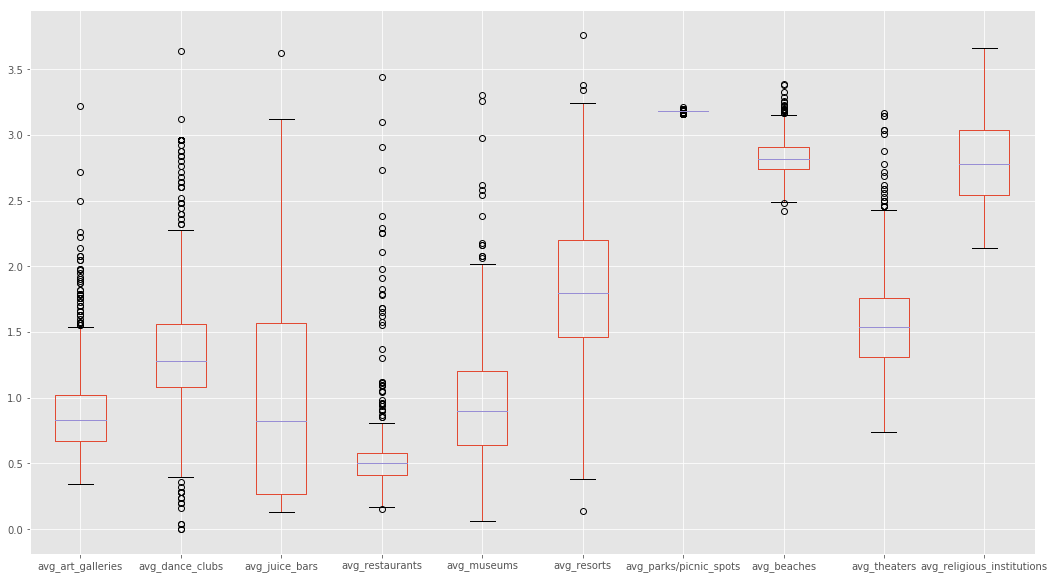

In [38]:
# boxplots of ALL columns
df.boxplot(figsize=(18, 10))

In [50]:
# pairs of columns with high correlation 


In [39]:
# Create 2D scatter plots of such pair